In [2]:
using Revise, Plots, LinearAlgebra, Random, Images
using ForwardDiff

In [3]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes


Define ground truth amplitudes and positions

In [4]:
domain = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

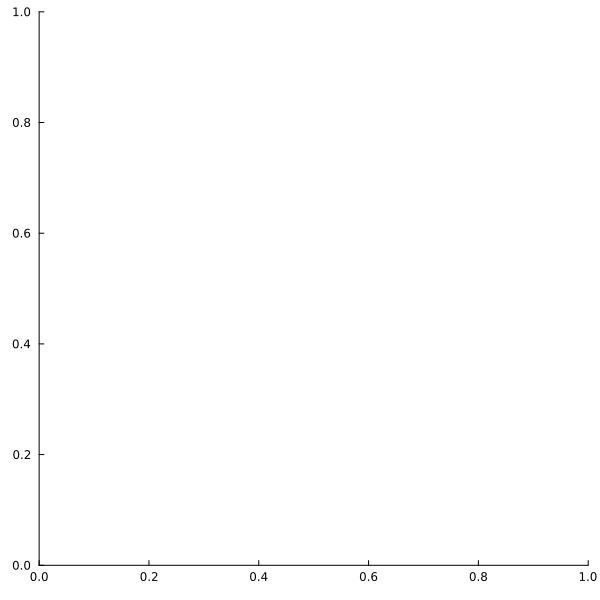

In [5]:
# Define the plot
num_points = 64

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]

grid = range(0, stop=1, length=num_points)
plot_size = (400, 400) .* 1.5
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, size=plot_size, grid=false)

In [6]:
# const noise_mean = 0.0021172377176794793
const σ2 = let
    λ = 723.0 # Wavelength
    NA = 1.4 # Numerical aperture
    FWHM = λ / (2 * NA) # Full width at half maximum i.e. diffraction limit
    σ = FWHM / (2 * log(2.0))
    (σ / (64 * 100.0))^2
end
σ = sqrt(σ2)

ops = gaussian_operators_2D(σ, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.04734230098825078, [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.04734230098825078, [0.0, 0.015873015873015872, 0.031746031746031744, 0.0

In [94]:
plt_obs = deepcopy(plt)

image = load("../../SMLM/high_density_data/sequence/00235.tif")

y = channelview(image)

64×64 reinterpret(reshape, N0f16, ::Matrix{Gray{N0f16}}) with eltype N0f16:
 0.00218  0.00218  0.00198  0.00229  …  0.00215  0.00224  0.00195  0.00223
 0.00238  0.00192  0.00229  0.00201     0.00215  0.00191  0.00215  0.00211
 0.00218  0.00211  0.00189  0.00195     0.00206  0.00194  0.00203  0.00227
 0.00185  0.00177  0.00218  0.00209     0.00171  0.00226  0.00224  0.00212
 0.00243  0.00201  0.0023   0.00186     0.00197  0.0025   0.002    0.00252
 0.00209  0.00221  0.00192  0.00209  …  0.00195  0.00227  0.00214  0.00227
 0.00218  0.00197  0.00229  0.00211     0.0018   0.0018   0.00227  0.00189
 0.00214  0.00243  0.00243  0.00211     0.00208  0.002    0.00203  0.00211
 0.0025   0.00221  0.00256  0.00203     0.00195  0.00227  0.00233  0.00169
 0.00246  0.00284  0.00226  0.0025      0.00215  0.00229  0.00215  0.00198
 ⋮                                   ⋱  ⋮                          
 0.0023   0.00197  0.00165  0.00218  …  0.00198  0.00212  0.00204  0.00188
 0.00235  0.00224  0.00224  0.0

In [95]:
prob = BLASSO(vec(y), ops, domain)

BLASSO(N0f16[0.00218N0f16, 0.00238N0f16, 0.00218N0f16, 0.00185N0f16, 0.00243N0f16, 0.00209N0f16, 0.00218N0f16, 0.00214N0f16, 0.0025N0f16, 0.00246N0f16  …  0.00192N0f16, 0.00188N0f16, 0.00186N0f16, 0.00188N0f16, 0.00185N0f16, 0.00177N0f16, 0.00209N0f16, 0.00212N0f16, 0.00214N0f16, 0.00183N0f16], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.04734230098825078, [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01587301587301

In [96]:
n_spikes = 30
solve!(prob, :MDP, options=Dict(:maxits => n_spikes, :δ => 0.2))

λ : 0.011280184296903199


SFW iterations:  2    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     4.386295e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 1.58e-10 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

  1.813810 seconds (2.66 M allocations: 156.139 MiB, 95.96% compilation time)
r : 0.2961210566486577
τδ: 0.22000000000000003
μ : DiscreteMeasure([[0.8725575886785568], [0.4175456508437263]], [0.0016939074562943301], 2, 1)
λ : 0.010152165867212879
  0.023000 seconds (2.84 k allocations: 8.312 MiB)
r : 0.29439148922819586
τδ: 0.22000000000000003
μ : DiscreteMeasure([[0.8725575886785568], [0.4175456508437263]], [0.04934762965203254], 2, 1)
λ : 0.009136949280491592
  0.062585 seconds (2.84 k allocatio

SFW iterations:  2    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     4.365200e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 1.22e-08 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1



SFW iterations:  3    Time: 0:00:02

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 1.22e-08 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1



SFW iterations:  4    Time: 0:00:03

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * S

SFW iterations:  14    Time: 0:00:04

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * S

SFW iterations:  23    Time: 0:00:04

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * Candidate solution
    Final objective value:     4.362284e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 3.01e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * S

SFW iterations:  3    Time: 0:00:01

 * Candidate solution
    Final objective value:     4.321587e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 1.04e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * Candidate solution
    Final objective value:     4.320831e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 9.37e-06 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * C

SFW iterations:  3    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.268101e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.08e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.24e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.19e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.13e-07 ≰ 0.0e+00
    |g(x)|                 = 9.09e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    1
    f(x) calls:    2
    ∇f(x) calls:   2



SFW iterations:  4    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     4.264885e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 9.12e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

 * Status: success

 * Candidate solution
    Final objective value:     4.256212e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.03e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.18e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.07e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.87e-07 ≰ 0.0e+00
    |g(x)|                 = 8.63e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    3
    f(x) calls:    4
    ∇f(x) calls:

SFW iterations:  6    Time: 0:00:01

 * Candidate solution
    Final objective value:     4.241661e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 7.55e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.64e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.31e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.08e-06 ≰ 0.0e+00
    |g(x)|                 = 8.52e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    2
    f(x) calls:    3
    ∇f(x) calls:   3

  1.332740 seconds (2.88 M allocations: 430.996 MiB, 9.18% gc time, 79.26% compilation time)
r : 0.2659758823468113
τδ: 0.22000000000000003
μ : DiscreteMeasure([[0.8730125008366327, 0.498329209582571, 0.28351767200705325, 0.8058546293725952, 0.6373692399184246, 0.7137426102797709, 0.4999938120305252, 0.32828588860402447, 0.6690527469912035, 0.5106364324219533, 0.19638840636482205, 0.4188150721190952], [0.4167933750302783, 0.2949673741107448, 0.7099826299695445, 0.5002956979213785, 0.5911657042567616, 0.3793

SFW iterations:  2    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.157465e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.58e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.81e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.64e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.76e-07 ≰ 0.0e+00
    |g(x)|                 = 6.82e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    3
    f(x) calls:    4
    ∇f(x) calls:   4

 * Status: success

 * Candidate solution
    Final objective value:     4.156629e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.98e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.99e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.34e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.63e-06 ≰ 0.0e+00
    |g(x)|                 = 5.94e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    2
    f(x) calls:    3
    ∇f

SFW iterations:  4    Time: 0:00:00

 * Candidate solution
    Final objective value:     4.156450e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 6.64e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1



SFW iterations:  5    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.156008e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.56e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.51e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.34e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.25e-06 ≰ 0.0e+00
    |g(x)|                 = 7.74e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    4
    f(x) calls:    5
    ∇f(x) calls:   5



SFW iterations:  6    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     4.154106e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 8.92e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.02e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.98e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.44e-06 ≰ 0.0e+00
    |g(x)|                 = 7.81e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    20
    f(x) calls:    21
    ∇f(x) calls:   21

 * Status: success

 * Candidate solution
    Final objective value:     4.154067e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.86e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.08e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.60e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.66e-07 ≰ 0.0e+00
    |g(x)|                 = 4.66e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    1
    f(x) calls:    2
   

SFW iterations:  8    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     4.152890e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 4.77e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

  1.204770 seconds (75.18 k allocations: 1.472 GiB, 18.22% gc time, 4.03% compilation time)
r : 0.25404671331422674
τδ: 0.22000000000000003
μ : DiscreteMeasure([[0.8731677145267704, 0.49801749627289826, 0.28430170230524715, 0.8055544848289874, 0.6355948152206184, 0.7005886118521936, 0.5010262330718335, 0.32828541370468345, 0.6686114070314074, 0.511164793190293, 0.19557524007222354, 0.41811274794646197, 0.5827406290224593, 0.6772001693527652, 0.3089525612698957, 0.48977882258923894, 0.7526657755312

SFW iterations:  2    Time: 0:00:00

 * Candidate solution
    Final objective value:     4.047211e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.72e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.26e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.03e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.00e-06 ≰ 0.0e+00
    |g(x)|                 = 9.63e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    4
    f(x) calls:    5
    ∇f(x) calls:   5



SFW iterations:  3    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.046114e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.09e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.21e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.38e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.08e-06 ≰ 0.0e+00
    |g(x)|                 = 9.32e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    1
    f(x) calls:    2
    ∇f(x) calls:   2



SFW iterations:  4    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.043775e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 8.26e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.20e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.02e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.51e-06 ≰ 0.0e+00
    |g(x)|                 = 7.58e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    6
    f(x) calls:    7
    ∇f(x) calls:   7



SFW iterations:  5    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     4.043752e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.85e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.29e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.94e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.26e-07 ≰ 0.0e+00
    |g(x)|                 = 6.78e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    2
    f(x) calls:    7
    ∇f(x) calls:   3

 * Status: success

 * Candidate solution
    Final objective value:     4.043751e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 5.11e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:

SFW iterations:  2    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     3.912718e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.83e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.37e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.22e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.11e-06 ≰ 0.0e+00
    |g(x)|                 = 9.80e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    6
    f(x) calls:    7
    ∇f(x) calls:   7



SFW iterations:  3    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     3.903072e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.02e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.24e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.76e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.22e-06 ≰ 0.0e+00
    |g(x)|                 = 7.48e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    3
    f(x) calls:    4
    ∇f(x) calls:   4



SFW iterations:  4    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     3.901563e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.38e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.09e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.73e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.72e-06 ≰ 0.0e+00
    |g(x)|                 = 9.91e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    17
    f(x) calls:    18
    ∇f(x) calls:   18



SFW iterations:  5    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     3.900553e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.02e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.13e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.41e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.18e-06 ≰ 0.0e+00
    |g(x)|                 = 9.25e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    4
    f(x) calls:    5
    ∇f(x) calls:   5

 * Status: success

 * Candidate solution
    Final objective value:     3.900530e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00


SFW iterations:  6    Time: 0:00:02

    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 7.54e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1

  2.077762 seconds (47.64 k allocations: 2.770 GiB, 15.39% gc time)
r : 0.22764938964128317
τδ: 0.22000000000000003
μ : DiscreteMeasure([[0.8731569829999172, 0.4922514548058257, 0.284898905637014, 0.8049645581205004, 0.6332203700109078, 0.694245557036225, 0.5058332683120034, 0.3282834772816765, 0.6661729767275234, 0.511470441826988, 0.19456117955742758, 0.41668387388872036, 0.5816548565901284, 0.6740644253700198, 0.31505236506009704, 0.4923856836445613, 0.7554652297627992, 0.8991005732031737, 0.8025156379781857, 0.34335663751040746, 0.5647742276726644, 0.13716716118155012, 0.4126638940069107, 0.7480461348652504, 0.27485770061541887, 0.708989072391232], [0.4144030183907784, 0.2966981648246096, 0.7108951256258303, 0.5010073758666453, 0.5957943257820401, 0.3929873897600551, 0.8471770

SFW iterations:  2    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     3.756687e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.54e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.93e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.23e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.28e-06 ≰ 0.0e+00
    |g(x)|                 = 6.43e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    6
    f(x) calls:    7
    ∇f(x) calls:   7



SFW iterations:  3    Time: 0:00:00

 * Status: success

 * Candidate solution
    Final objective value:     3.755270e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.34e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.82e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.23e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.27e-06 ≰ 0.0e+00
    |g(x)|                 = 4.92e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    2
    f(x) calls:    3
    ∇f(x) calls:   3



SFW iterations:  4    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     3.735063e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.08e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.53e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.12e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.10e-06 ≰ 0.0e+00
    |g(x)|                 = 8.99e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    5
    f(x) calls:    6
    ∇f(x) calls:   6



SFW iterations:  5    Time: 0:00:01

 * Status: success

 * Candidate solution
    Final objective value:     3.731146e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.71e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.12e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.36e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.51e-06 ≰ 0.0e+00
    |g(x)|                 = 9.52e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    5
    f(x) calls:    6
    ∇f(x) calls:   6

 * Status: success

 * Candidate solution
    Final objective value:     3.731128e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 8.21e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:

BLASSO(N0f16[0.00218N0f16, 0.00238N0f16, 0.00218N0f16, 0.00185N0f16, 0.00243N0f16, 0.00209N0f16, 0.00218N0f16, 0.00214N0f16, 0.0025N0f16, 0.00246N0f16  …  0.00192N0f16, 0.00188N0f16, 0.00186N0f16, 0.00188N0f16, 0.00185N0f16, 0.00177N0f16, 0.00209N0f16, 0.00212N0f16, 0.00214N0f16, 0.00183N0f16], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.04734230098825078, [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.01587301587301

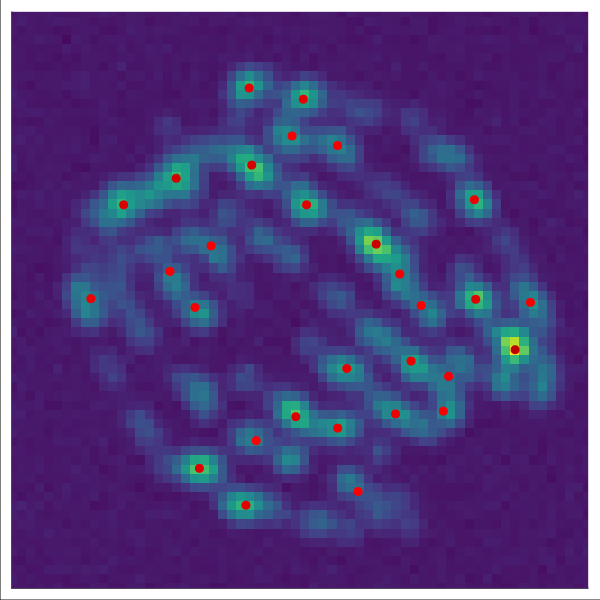

In [97]:
heatmap!(plt_obs, grid, grid, y ./ maximum(y), c=:viridis)

plot_spikes!(plt_obs, prob.μ)

In [102]:
ns = 0.005
xvals = deepcopy(prob.μ.x) .+ [randn(size(prob.μ.x[1])) .* ns, randn(size(prob.μ.x[2])) .* 0.01ns]
avals = deepcopy(prob.μ.a) .+ randn(size(prob.μ.a)) .* ns

31-element Vector{Float64}:
 0.2996966090003178
 0.17537406802022576
 0.22473057858277543
 0.16662963498804498
 0.23747913616644534
 0.11305661190622451
 0.13030692595641077
 0.17726754967304434
 0.10799619342679208
 0.1434160598494211
 ⋮
 0.12473716750496772
 0.08251894555695743
 0.052529549407093784
 0.053879548183608315
 0.04810160063070331
 0.14235398703959024
 0.08593166445873884
 0.04891978017546444
 0.03358693836977019

In [39]:
function local_descent_l1!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    function func(xa)
        x1 = @view xa[1:s]
        x2 = @view xa[s+1:2s]
        a = @view xa[2s+1:end]
        return λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
    end

    ax0 = vcat(x1vals, x2vals, avals)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s), fill(min_amplitude, s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s), fill(Inf, s))
    clamp_strict!(ax0, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        func,
        ax0,
        optimizer,
        Optim.Options(g_tol=1e-4, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    xa_opt = Optim.minimizer(result)

    println(result)

    clamp_strict!(xa_opt, lower_bounds, upper_bounds)

    x1vals .= xa_opt[1:s]
    x2vals .= xa_opt[s+1:2s]
    avals .= xa_opt[2s+1:end]

    Optim.trace(result)
end

local_descent_l1! (generic function with 4 methods)

In [40]:
function local_descent_l2!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    function func(xuv)
        x1 = xuv[1:s]
        x2 = xuv[s+1:2s]
        u = xuv[2s+1:3s]
        v = xuv[3s+1:end]
        return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y - Φ(x1, x2, u .* v))
    end

    u0 = sqrt.(abs.(avals))
    v0 = avals ./ u0

    xuv0 = vcat(x1vals, x2vals, u0, v0)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s), fill(0, s), fill(min_amplitude, s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s), fill(Inf, s), fill(Inf, s))
    clamp_strict!(xuv0, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        func,
        xuv0,
        optimizer,
        Optim.Options(g_tol=1e-4, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    xuv_opt = Optim.minimizer(result)

    println(result)

    clamp_strict!(xuv_opt, lower_bounds, upper_bounds)

    x1vals .= xuv_opt[1:s]
    x2vals .= xuv_opt[s+1:2s]

    avals .= xuv_opt[2s+1:3s] .* xuv_opt[3s+1:end]

    Optim.trace(result)
end

local_descent_l2! (generic function with 2 methods)

In [41]:
function replace_nonfinite!(A)
    for i in eachindex(A)
        if !isfinite(A[i])
            A[i] = 0.0
        end
    end
    return A
end

function local_descent_l2_nested!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    function func(xu)
        x1 = @view xu[1:s]
        x2 = @view xu[s+1:2s]
        u = @view xu[2s+1:end]
        M = Φ(x1, x2, diagm(u))
        replace_nonfinite!(M)
        v = (M'M + λ * I(s)) \ M'y
        return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y - M * v)
    end

    u0 = sqrt.(abs.(avals))
    xu0 = vcat(x1vals, x2vals, u0)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s), fill(min_amplitude, s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s), fill(Inf, s))
    clamp_strict!(xu0, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        func,
        xu0,
        optimizer,
        Optim.Options(g_tol=1e-4, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    xu_opt = Optim.minimizer(result)

    println(result)

    clamp_strict!(xu_opt, lower_bounds, upper_bounds)

    x1vals .= xu_opt[1:s]
    x2vals .= xu_opt[s+1:2s]

    u_opt = xu_opt[2s+1:end]
    M = Φ(x1vals, x2vals, diagm(u_opt))
    v = (M'M + λ * I(s)) \ M'y

    avals .= u_opt .* v

    Optim.trace(result)
end

local_descent_l2_nested! (generic function with 2 methods)

In [71]:
function local_descent_lasso_nested_l1!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    a = avals

    η_max = 0.9
    c = 0.9
    η = η_max
    r_prev = Inf

    function func(x, a)
        x1 = @view x[1:s]
        x2 = @view x[s+1:2s]

        tol = r_prev < Inf ? η * r_prev : η_max

        afwd = ForwardDiff.convert.(eltype(x1), a)

        res = optimize(
            a -> λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a)),
            afwd,
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(f_tol=tol);
            autodiff=:forward
        )
        afwd .= Optim.minimizer(res)

        a .= ForwardDiff.value.(afwd)

        r = λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
        r_new = ForwardDiff.value(r)

        # update forcing term η_{k+1} = min(η_max, c·R_new/R_prev)
        if r_prev < Inf
            η = min(η_max, c * (r_new / r_prev))
        end
        r_prev = r_new

        return r
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        x -> func(x, a),
        x00,
        optimizer,
        Optim.Options(g_tol=5e-5, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    x0_opt = Optim.minimizer(result)

    println(result)

    x1vals .= x0_opt[1:s]
    x2vals .= x0_opt[s+1:2s]

    Optim.trace(result)
end

local_descent_lasso_nested_l1! (generic function with 2 methods)

In [58]:
function local_descent_lasso_nested_l2!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    a = avals

    η_max = 0.9
    c = 0.9
    η = η_max
    r_prev = Inf

    function func(x, a)
        x1 = @view x[1:s]
        x2 = @view x[s+1:2s]

        tol = r_prev < Inf ? η * r_prev : η_max

        afwd = ForwardDiff.convert.(eltype(x1), a)

        u = sqrt.(abs.(afwd))
        v = afwd ./ u
        uv = vcat(u, v)

        function func_inner(uv)
            u = @view uv[1:s]
            v = @view uv[s+1:2s]
            return λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- Φ(x1, x2, u .* v))
        end

        res = optimize(
            func_inner,
            uv,
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(f_tol=tol);
            autodiff=:forward
        )
        uv .= Optim.minimizer(res)

        u = @view uv[1:s]
        v = @view uv[s+1:2s]
        a .= ForwardDiff.value.(u .* v)

        r = λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
        r_new = ForwardDiff.value(r)

        # update forcing term η_{k+1} = min(η_max, c·R_new/R_prev)
        if r_prev < Inf
            η = min(η_max, c * (r_new / r_prev))
        end
        r_prev = r_new

        return r
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        x -> func(x, a),
        x00,
        optimizer,
        Optim.Options(g_tol=5e-5, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    x0_opt = Optim.minimizer(result)

    println(result)

    x1vals .= x0_opt[1:s]
    x2vals .= x0_opt[s+1:2s]

    Optim.trace(result)
end

local_descent_lasso_nested_l2! (generic function with 2 methods)

In [67]:
function local_descent_lasso_nested_l2_nested!(
    xvals::AbstractVector{<:AbstractVector{T}},
    avals::AbstractVector{T},
    Φ::Function,
    y::AbstractVector{<:Number},
    λ::Real,
    domain::AbstractVector{<:AbstractVector{<:Real}},
    min_amplitude::Real,
    method::Symbol=:BFGS,
) where {T<:Real}
    x1vals, x2vals = xvals

    s = length(avals)

    a = avals

    η_max = 0.9
    c = 0.9
    η = η_max
    r_prev = Inf

    function func(x, a)
        x1 = @view x[1:s]
        x2 = @view x[s+1:2s]

        tol = r_prev < Inf ? η * r_prev : η_max

        afwd = ForwardDiff.convert.(eltype(x1), a)

        u = sqrt.(abs.(afwd))

        function func_inner(u)
            M = Φ(x1, x2, diagm(u))
            replace_nonfinite!(M)
            v = (M'M + λ * I(s)) \ M'y
            return 0.5λ * (sum(abs2, u) + sum(abs2, v)) + 0.5 * sum(abs2, y .- M * v)
        end

        res = optimize(
            func_inner,
            u,      
            BFGS(linesearch=LineSearches.BackTracking()),
            Optim.Options(f_tol=tol);
            autodiff=:forward
        )

        u .= Optim.minimizer(res)

        M = Φ(x1vals, x2vals, diagm(u))
        v = (M'M + λ * I(s)) \ M'y

        afwd .= u .* v

        a .= ForwardDiff.value.(afwd)

        r = λ * norm(a, 1) + 0.5 * sum(abs2, y .- Φ(x1, x2, a))
        r_new = ForwardDiff.value(r)

        # update forcing term η_{k+1} = min(η_max, c·R_new/R_prev)
        if r_prev < Inf
            η = min(η_max, c * (r_new / r_prev))
        end
        r_prev = r_new

        return r
    end

    x00 = vcat(x1vals, x2vals)
    lower_bounds = vcat(fill(domain[1][1], s), fill(domain[2][1], s))
    upper_bounds = vcat(fill(domain[1][2], s), fill(domain[2][2], s))
    clamp_strict!(x00, lower_bounds, upper_bounds)

    optimizer = (method == :BFGS ? BFGS : LBFGS)(linesearch=LineSearches.BackTracking())

    result = optimize(
        x -> func(x, a),
        x00,
        optimizer,
        Optim.Options(g_tol=5e-5, store_trace=true, time_limit=20);
        autodiff=:forward
    )
    display(result)
    x0_opt = Optim.minimizer(result)

    x1vals .= x0_opt[1:s]
    x2vals .= x0_opt[s+1:2s]

    Optim.trace(result)
end

local_descent_lasso_nested_l2_nested! (generic function with 2 methods)

In [84]:
l1_xvals = deepcopy(xvals)
l1_avals = deepcopy(avals)
l1_trace = local_descent_l1!(
    l1_xvals,
    l1_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     3.374729e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 5.87e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.79e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.64e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.86e-06 ≰ 0.0e+00
    |g(x)|                 = 9.26e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    18
    f(x) calls:    19
    ∇f(x) calls:   19



In [85]:
l1_lbfgs_xvals = deepcopy(xvals)
l1_lbfgs_avals = deepcopy(avals)
l1_lbfgs_trace = local_descent_l1!(
    l1_lbfgs_xvals,
    l1_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
    :LBFGS,
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     3.374741e-02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.99e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.46e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.89e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.57e-06 ≰ 0.0e+00
    |g(x)|                 = 8.01e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    13
    f(x) calls:    14
    ∇f(x) calls:   14



In [86]:
l2_xvals = deepcopy(xvals)
l2_avals = deepcopy(avals)
l2_trace = local_descent_l2!(
    l2_xvals,
    l2_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     3.374938e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 9.34e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.08e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.48e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.35e-06 ≰ 0.0e+00
    |g(x)|                 = 9.37e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   2  (vs limit 20)
    Iterations:    26
    f(x) calls:    27
    ∇f(x) calls:   27



In [87]:
l2_lbfgs_xvals = deepcopy(xvals)
l2_lbfgs_avals = deepcopy(avals)
l2_lbfgs_trace = local_descent_l2!(
    l2_lbfgs_xvals,
    l2_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     3.374938e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 9.34e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.08e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.48e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.35e-06 ≰ 0.0e+00
    |g(x)|                 = 9.37e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   2  (vs limit 20)
    Iterations:    26
    f(x) calls:    27
    ∇f(x) calls:   27



In [88]:
l2_nested_xvals = deepcopy(xvals)
l2_nested_avals = deepcopy(avals)
l2_nested_trace = local_descent_l2_nested!(
    l2_nested_xvals,
    l2_nested_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: success

 * Candidate solution
    Final objective value:     3.374799e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.38e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.59e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.09e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.19e-06 ≰ 0.0e+00
    |g(x)|                 = 9.08e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   12  (vs limit 20)
    Iterations:    25
    f(x) calls:    26
    ∇f(x) calls:   26



In [89]:
lasso_nested_l1_xvals = deepcopy(xvals)
lasso_nested_l1_avals = deepcopy(avals)
lasso_nested_l1_trace = local_descent_lasso_nested_l1!(
    lasso_nested_l1_xvals,
    lasso_nested_l1_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: failure (exceeded time limit of 20.0)

 * Candidate solution
    Final objective value:     3.374809e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 9.92e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.15e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.23e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.60e-06 ≰ 0.0e+00
    |g(x)|                 = 1.54e-04 ≰ 5.0e-05

 * Work counters
    Seconds run:   22  (vs limit 20)
    Iterations:    12
    f(x) calls:    13
    ∇f(x) calls:   13



In [90]:
lasso_nested_l2_xvals = deepcopy(xvals)
lasso_nested_l2_avals = deepcopy(avals)
lasso_nested_l2_trace = local_descent_lasso_nested_l2!(
    lasso_nested_l2_xvals,
    lasso_nested_l2_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: failure (line search failed)

 * Candidate solution
    Final objective value:     3.812751e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 4.38e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.15e-03 ≰ 0.0e+00
    |g(x)|                 = 1.19e-03 ≰ 5.0e-05

 * Work counters
    Seconds run:   0  (vs limit 20)
    Iterations:    1
    f(x) calls:    16
    ∇f(x) calls:   1



In [91]:
lasso_nested_l2_nested_xvals = deepcopy(xvals)
lasso_nested_l2_nested_avals = deepcopy(avals)
lasso_nested_l2_nested_trace = local_descent_lasso_nested_l2_nested!(
    xvals,
    avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
nothing

 * Status: failure (exceeded time limit of 20.0)

 * Candidate solution
    Final objective value:     3.384269e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.92e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.38e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.20e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.54e-03 ≰ 0.0e+00
    |g(x)|                 = 2.30e-03 ≰ 5.0e-05

 * Work counters
    Seconds run:   24  (vs limit 20)
    Iterations:    1
    f(x) calls:    2
    ∇f(x) calls:   2


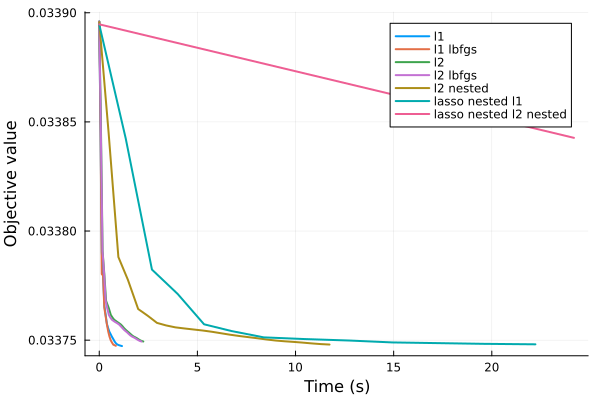

In [92]:
l1_trace_time = accumulate_traces_time(l1_trace)
l1_lbfgs_trace_time = accumulate_traces_time(l1_lbfgs_trace)
l2_trace_time = accumulate_traces_time(l2_trace)
l2_lbfgs_trace_time = accumulate_traces_time(l2_lbfgs_trace)
l2_nested_trace_time = accumulate_traces_time(l2_nested_trace)
lasso_nested_l1_trace_time = accumulate_traces_time(lasso_nested_l1_trace)
lasso_nested_l2_trace_time = accumulate_traces_time(lasso_nested_l2_trace)
lasso_nested_l2_nested_trace_time = accumulate_traces_time(lasso_nested_l2_nested_trace)

plot(
    l1_trace_time[:time],
    l1_trace_time[:objective],
    label="l1",
    linewidth=2,
)
plot!(
    l1_lbfgs_trace_time[:time],
    l1_lbfgs_trace_time[:objective],
    label="l1 lbfgs",
    linewidth=2,
)
plot!(
    l2_trace_time[:time],
    l2_trace_time[:objective],
    label="l2",
    linewidth=2,
)
plot!(
    l2_lbfgs_trace_time[:time],
    l2_lbfgs_trace_time[:objective],
    label="l2 lbfgs",
    linewidth=2,
)
plot!(
    l2_nested_trace_time[:time],
    l2_nested_trace_time[:objective],
    label="l2 nested",
    linewidth=2,
)
plot!(
    lasso_nested_l1_trace_time[:time],
    lasso_nested_l1_trace_time[:objective],
    label="lasso nested l1",
    linewidth=2,
)
# plot!(
#     lasso_nested_l2_trace_time[:time],
#     lasso_nested_l2_trace_time[:objective],
#     label="lasso nested l2",
#     linewidth=2,
# )
plot!(
    lasso_nested_l2_nested_trace_time[:time],
    lasso_nested_l2_nested_trace_time[:objective],
    label="lasso nested l2 nested",
    linewidth=2,
)

# plot!(xlims=(0, 1))
# plot!(ylims=(0.02375, 0.02384))
plot!(xlabel="Time (s)", ylabel="Objective value") 

In [ ]:
# savefig("Trace_comparison.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\examples\\Benchmarking\\Trace_comparison.svg"

In [50]:
function accumulate_traces_time(trace)
    times = Float64[]
    objectives = Float64[]
    cum_time = 0.0
    last_time = 0.0

    for t in trace
        curr_time = t.metadata["time"]

        # Detect reset of inner solver (time goes back to 0)
        if curr_time < last_time
            # Add final time from previous inner problem to accumulator
            cum_time += last_time
        end

        push!(times, cum_time + curr_time)
        push!(objectives, t.value)
        last_time = curr_time
    end

    return Dict(:time => times, :objective => objectives)
end

accumulate_traces_time (generic function with 1 method)

 * Status: success

 * Candidate solution
    Final objective value:     3.571460e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.89e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.43e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.91e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.35e-06 ≰ 0.0e+00
    |g(x)|                 = 9.28e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    15
    f(x) calls:    16
    ∇f(x) calls:   16

 * Status: success

 * Candidate solution
    Final objective value:     3.571443e-02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.58e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.76e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.79e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.18e-06 ≰ 0.0e+00
    |g(x)|                 = 6.66e-05 ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit 20)
    Iterations:    14
    f(x) calls:    15

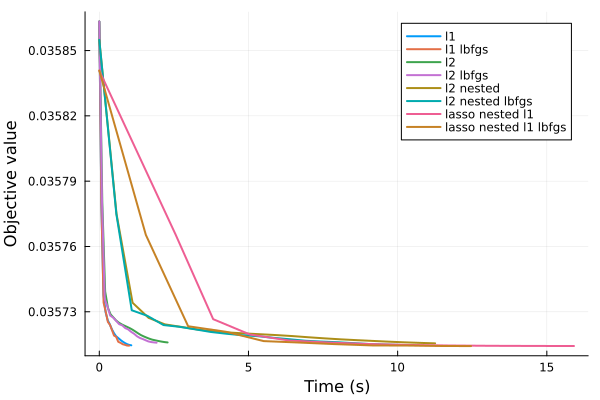

In [103]:
l1_xvals = deepcopy(xvals)
l1_avals = deepcopy(avals)
l1_trace = local_descent_l1!(
    l1_xvals,
    l1_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
l1_lbfgs_xvals = deepcopy(xvals)
l1_lbfgs_avals = deepcopy(avals)
l1_lbfgs_trace = local_descent_l1!(
    l1_lbfgs_xvals,
    l1_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
    :LBFGS,
)
l2_xvals = deepcopy(xvals)
l2_avals = deepcopy(avals)
l2_trace = local_descent_l2!(
    l2_xvals,
    l2_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
l2_lbfgs_xvals = deepcopy(xvals)
l2_lbfgs_avals = deepcopy(avals)
l2_lbfgs_trace = local_descent_l2!(
    l2_lbfgs_xvals,
    l2_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
    :LBFGS,
)
l2_nested_xvals = deepcopy(xvals)
l2_nested_avals = deepcopy(avals)
l2_nested_trace = local_descent_l2_nested!(
    l2_nested_xvals,
    l2_nested_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
l2_nested_lbfgs_xvals = deepcopy(xvals)
l2_nested_lbfgs_avals = deepcopy(avals)
l2_nested_lbfgs_trace = local_descent_l2_nested!(
    l2_nested_lbfgs_xvals,
    l2_nested_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
    :LBFGS,
)
lasso_nested_l1_xvals = deepcopy(xvals)
lasso_nested_l1_avals = deepcopy(avals)
lasso_nested_l1_trace = local_descent_lasso_nested_l1!(
    lasso_nested_l1_xvals,
    lasso_nested_l1_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
)
lasso_nested_l1_lbfgs_xvals = deepcopy(xvals)
lasso_nested_l1_lbfgs_avals = deepcopy(avals)
lasso_nested_l1_lbfgs_trace = local_descent_lasso_nested_l1!(
    lasso_nested_l1_lbfgs_xvals,
    lasso_nested_l1_lbfgs_avals,
    ops.Φ,
    vec(y),
    prob.λ,
    domain,
    -Inf,
    :LBFGS,
)

l1_trace_time = accumulate_traces_time(l1_trace)
l1_lbfgs_trace_time = accumulate_traces_time(l1_lbfgs_trace)
l2_trace_time = accumulate_traces_time(l2_trace)
l2_lbfgs_trace_time = accumulate_traces_time(l2_lbfgs_trace)
l2_nested_trace_time = accumulate_traces_time(l2_nested_trace)
l2_nested_lbfgs_trace_time = accumulate_traces_time(l2_nested_lbfgs_trace)
lasso_nested_l1_trace_time = accumulate_traces_time(lasso_nested_l1_trace)
lasso_nested_l1_lbfgs_trace_time = accumulate_traces_time(lasso_nested_l1_lbfgs_trace)
plot(
    l1_trace_time[:time],
    l1_trace_time[:objective],
    label="l1",
    linewidth=2,
)
plot!(
    l1_lbfgs_trace_time[:time],
    l1_lbfgs_trace_time[:objective],
    label="l1 lbfgs",
    linewidth=2,
)
plot!(
    l2_trace_time[:time],
    l2_trace_time[:objective],
    label="l2",
    linewidth=2,
)
plot!(
    l2_lbfgs_trace_time[:time],
    l2_lbfgs_trace_time[:objective],
    label="l2 lbfgs",
    linewidth=2,
)
plot!(
    l2_nested_trace_time[:time],
    l2_nested_trace_time[:objective],
    label="l2 nested",
    linewidth=2,
)
plot!(
    l2_nested_lbfgs_trace_time[:time],
    l2_nested_lbfgs_trace_time[:objective],
    label="l2 nested lbfgs",
    linewidth=2,
)
plot!(
    lasso_nested_l1_trace_time[:time],
    lasso_nested_l1_trace_time[:objective],
    label="lasso nested l1",
    linewidth=2,
)
plot!(
    lasso_nested_l1_lbfgs_trace_time[:time],
    lasso_nested_l1_lbfgs_trace_time[:objective],
    label="lasso nested l1 lbfgs",
    linewidth=2,
)
plot!(xlabel="Time (s)", ylabel="Objective value")